In [19]:
from netCDF4 import Dataset

In [20]:
nc = Dataset('/home/asubedi/Desktop/data/raw-files/GLM/OR_GLM-L3-GLMF-M6_G16_s202315823490000_e202315823500000_c20231582351080.nc')

data = nc.variables['Flash_extent_density'][:]

In [21]:
sat_h = nc.variables['goes_imager_projection'].perspective_point_height
X = nc.variables['x'][:] * sat_h
Y = nc.variables['y'][:] * sat_h

# Satellite longitude
sat_lon = nc.variables['goes_imager_projection'].longitude_of_projection_origin

# Satellite sweep
sat_sweep = nc.variables['goes_imager_projection'].sweep_angle_axis

In [22]:
proj_var = nc.variables['goes_imager_projection']

sat_height = proj_var.perspective_point_height
central_lon = proj_var.longitude_of_projection_origin
semi_major = proj_var.semi_major_axis
semi_minor = proj_var.semi_minor_axis
print(proj_var)

<class 'netCDF4._netCDF4.Variable'>
int32 goes_imager_projection()
    long_name: GOES-R ABI fixed grid projection
    grid_mapping_name: geostationary
    latitude_of_projection_origin: 0.0
    longitude_of_projection_origin: -75.0
    semi_major_axis: 6378137
    semi_minor_axis: 6356752.31414
    perspective_point_height: 35786023.0
    inverse_flattening: 298.2572221
    sweep_angle_axis: x
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used


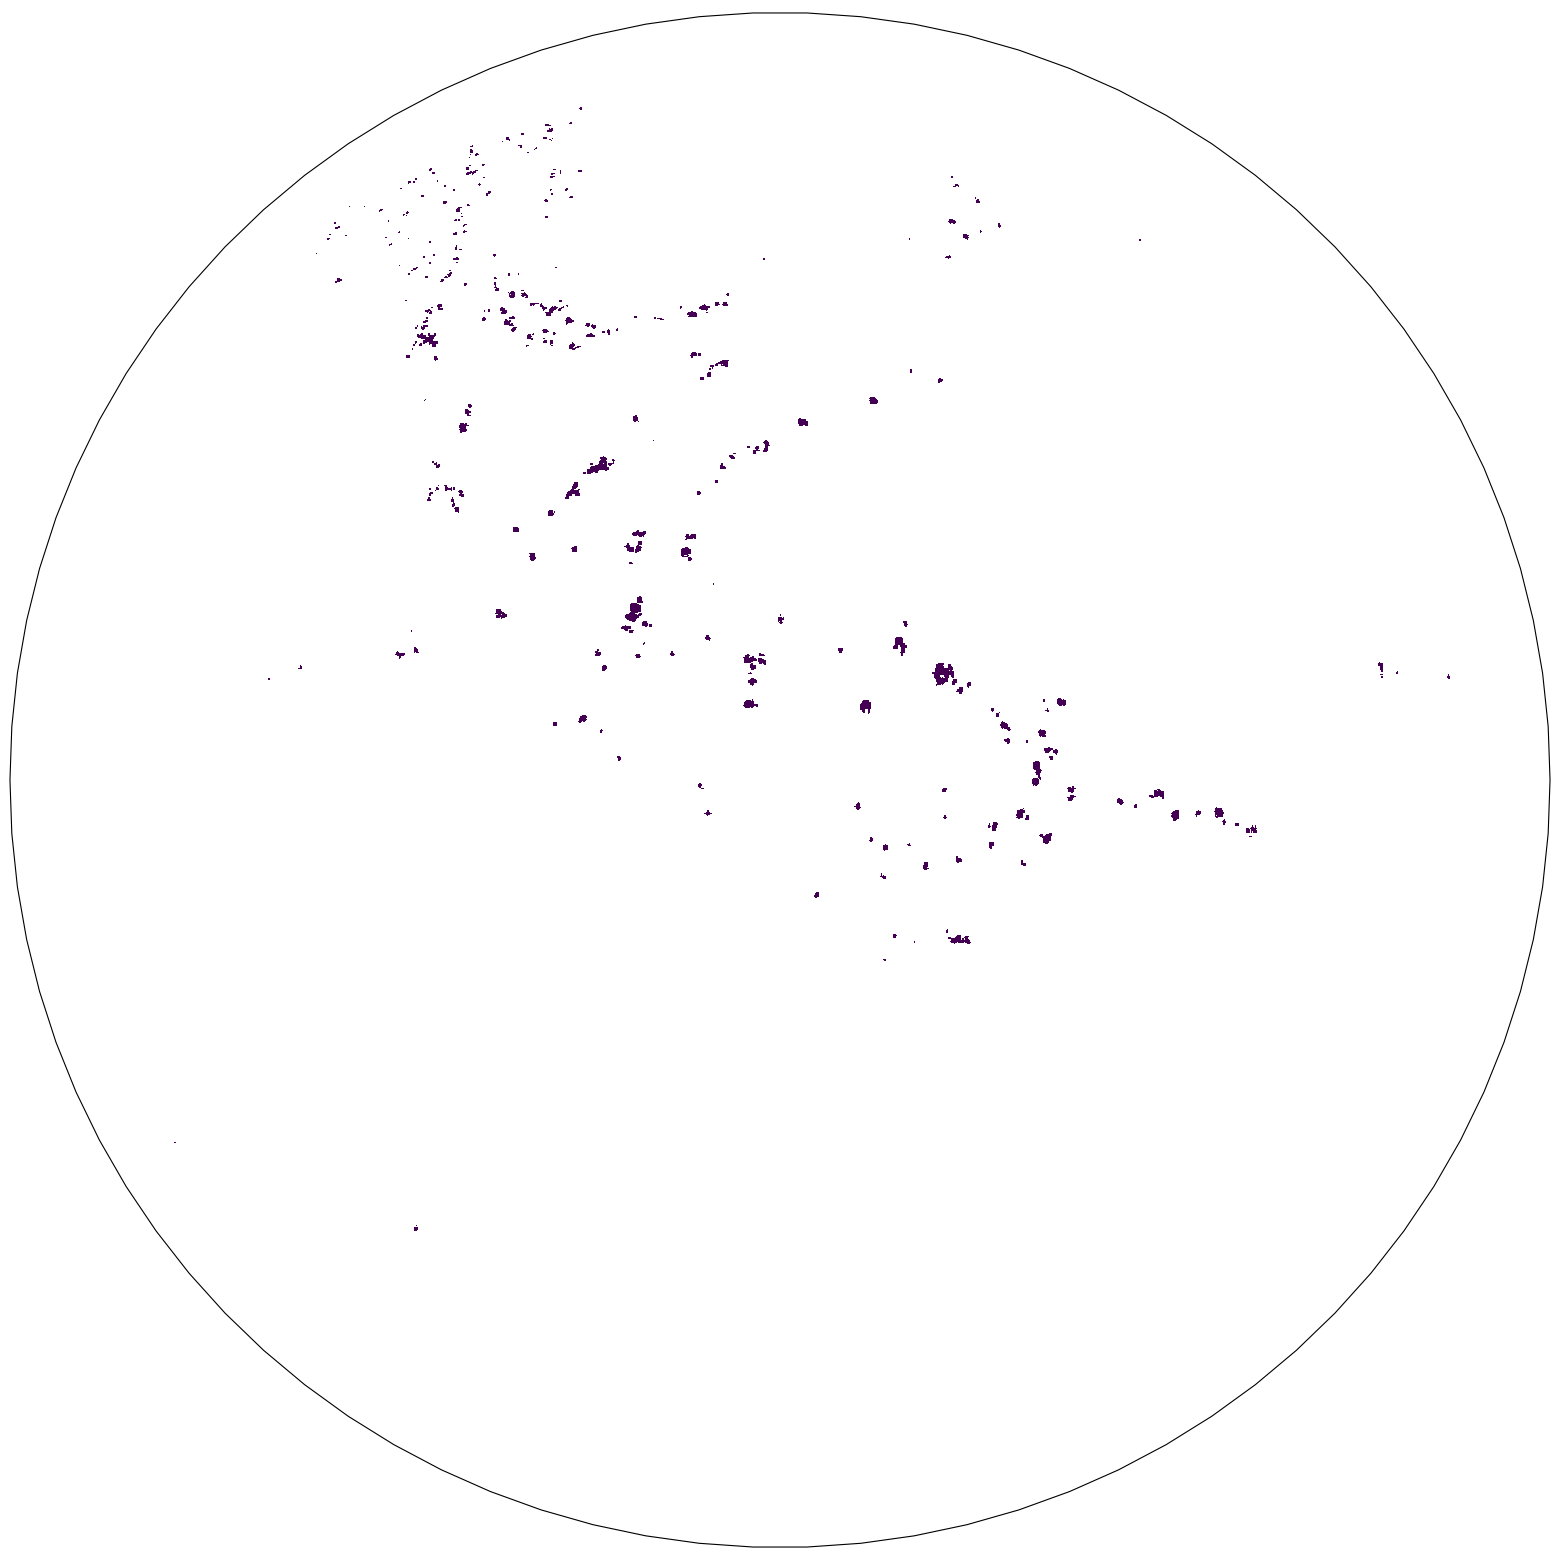

In [32]:
from matplotlib import pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure(figsize=(30,20))

globe = ccrs.Globe(semimajor_axis=semi_major, semiminor_axis=semi_minor)
proj = ccrs.Geostationary(central_longitude=central_lon, satellite_height=sat_height, globe=globe)

ax = fig.add_subplot(1, 1, 1, projection=proj)
IR_img = ax.imshow(data[:,:],origin='upper',extent=(X.min(), X.max(), Y.min(), Y.max()),interpolation='nearest',vmin=162.,vmax=330.)

In [39]:
import rasterio
from rasterio.transform import from_bounds

output_file = 'output.tif'  # Specify the output filename
width, height = IR_img.get_array().shape  # Get the width and height of the plot
crs = proj.proj4_init  # Get the coordinate reference system (CRS) from the projection
bounds = (X.min(), Y.min(), X.max(), Y.max())  # Specify the bounds of the plot
transform = from_bounds(*bounds, width, height)  # Create a transform from the bounds and dimensions

In [40]:
with rasterio.open(output_file, 'w', driver='GTiff', width=width, height=height, count=1, dtype=IR_img.get_array().dtype, crs=crs, transform=transform) as dst:
    dst.write(IR_img.get_array(), 1)

ERROR 1: PROJ: proj_create_from_name: /home/asubedi/miniconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
